# Actividad para prueba

El centro de estudios nucleares (CChen) en Chile decidió estudiar las variables que podrían
explicar los niveles de mercurio (Hg) en la sangre (mlHG). El estudio se basó en la colaboración
de una clínica de Santiago de Chile para extraer los datos de los pacientes que asistieron en un
mes en particular; respetando la privacidad de la información y su consentimiento para el uso
de los datos.
En la elaboración del estudio, se recopilaron alrededor de 480 pacientes, en el que para dicho
estudio se tuvo que realizar un marco teórico para definir las variables que habría que recopilar
para explicar los mililitros en la sangre de los pacientes.

Los investigadores consideran como deseable que la variable de estudio al menos tenga un ajuste con respecto a la recta de regresión de un 70 %; esto permitirá dejar de lado a personas que son atípicas a la muestra representativa de la población. En base a lo anterior, se solicita lo siguiente:
- Si encuentra datos atípicos , señale cuales son.
- Formule el mejor modelo.
- Al encontrar el mejor modelo, respalda claramente cual fue el criterio de selección ,
  acompañado de su interpretación.(coeficientes, estadístico Fisher y t-Student) .


## Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
from sklearn.preprocessing import LabelEncoder

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Datos

In [2]:
df = pd.read_csv('datasets/Actividad.csv')
df

,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe
0,17.33,16,No fuma,14,0,Si Cafe
1,7.50,12,Si fuma,10,0,Si Cafe
2,10.63,13,Si fuma,16,10,No Cafe
3,3.60,12,Si fuma,13,0,Si Cafe
4,4.50,12,Si fuma,36,6,Si Cafe
...,...,...,...,...,...,...
473,6.25,16,Si fuma,8,2,No Cafe
474,8.13,13,Si fuma,3,0,No Cafe
475,8.77,12,No fuma,15,0,Si Cafe
476,5.50,12,No fuma,18,3,No Cafe


In [3]:
# Buscar datos perdidos
df.describe()

,mlHG,cVerdura,cCarneKG,cPescadoKG
count,478.000000,478.000000,478.000000,478.000000
mean,8.513347,12.612971,17.008368,5.192469
std,55.296932,2.716284,13.581802,7.292955
min,0.530000,0.000000,1.000000,0.000000
25%,3.377500,12.000000,5.000000,0.000000
50%,4.680000,12.000000,13.000000,2.000000
75%,7.105000,14.000000,26.000000,7.000000
max,1212.000000,18.000000,51.000000,44.000000


In [4]:
# La base no tiene datos perdidos, se transformarán las variables categoricas

In [5]:
le = LabelEncoder()
dfle = df

dfle.dCigarro = le.fit_transform(dfle.dCigarro)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
model_mapping

{0: 'No fuma', 1: 'Si fuma'}

In [6]:
le = LabelEncoder()
dfle = df

dfle.dCafe = le.fit_transform(dfle.dCafe)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
model_mapping

{0: 'No Cafe', 1: 'Si Cafe'}

In [7]:
df.describe()

,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,8.513347,12.612971,0.485356,17.008368,5.192469,0.606695
std,55.296932,2.716284,0.500309,13.581802,7.292955,0.488995
min,0.530000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.377500,12.000000,0.000000,5.000000,0.000000,0.000000
50%,4.680000,12.000000,0.000000,13.000000,2.000000,1.000000
75%,7.105000,14.000000,1.000000,26.000000,7.000000,1.000000
max,1212.000000,18.000000,1.000000,51.000000,44.000000,1.000000


### Datos Atipicos

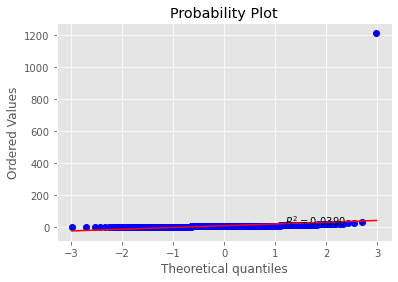

In [8]:
stats.probplot(df['mlHG'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [9]:
# Vamos a limpiar el valor Atipico
# Primero ordenaremos los valores de menor a mayor

df = df.sort_values('mlHG')
df

,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe
8,0.53,12,1,3,1,0
112,1.50,8,0,31,30,0
437,1.50,12,1,11,1,1
35,1.63,12,1,18,0,0
31,1.67,10,0,1,0,0
...,...,...,...,...,...,...
477,22.20,12,0,31,15,1
213,22.86,16,0,16,7,1
96,24.98,18,0,29,25,1
297,30.00,16,0,4,0,0


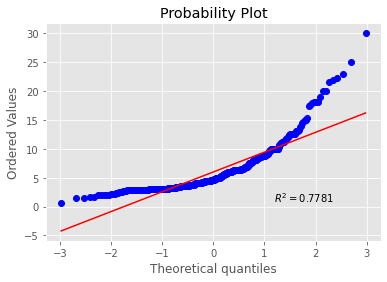

In [10]:
df = df[df['mlHG']<1212]
stats.probplot(df['mlHG'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [11]:
df

,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe
8,0.53,12,1,3,1,0
112,1.50,8,0,31,30,0
437,1.50,12,1,11,1,1
35,1.63,12,1,18,0,0
31,1.67,10,0,1,0,0
...,...,...,...,...,...,...
170,21.86,12,0,24,16,1
477,22.20,12,0,31,15,1
213,22.86,16,0,16,7,1
96,24.98,18,0,29,25,1


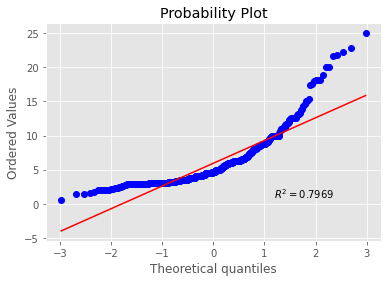

In [12]:
df = df[df['mlHG']<30]
stats.probplot(df['mlHG'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [13]:
df

,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe
8,0.53,12,1,3,1,0
112,1.50,8,0,31,30,0
437,1.50,12,1,11,1,1
35,1.63,12,1,18,0,0
31,1.67,10,0,1,0,0
...,...,...,...,...,...,...
43,21.63,18,1,8,8,0
170,21.86,12,0,24,16,1
477,22.20,12,0,31,15,1
213,22.86,16,0,16,7,1


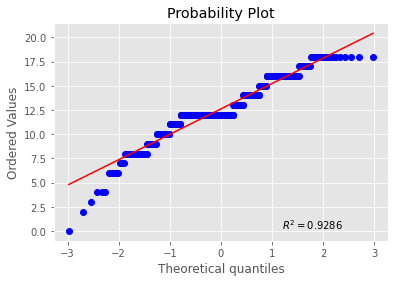

In [14]:
stats.probplot(df['cVerdura'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

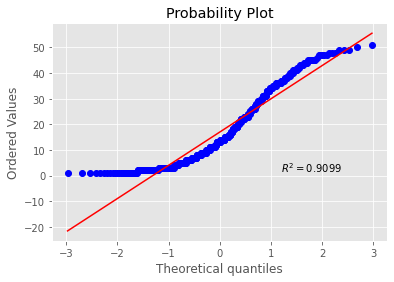

In [15]:
stats.probplot(df['cCarneKG'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

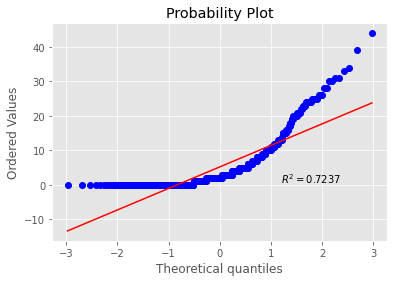

In [16]:
stats.probplot(df['cPescadoKG'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [17]:
df = df.sort_values('cPescadoKG')
df

,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe
188,3.05,12,1,10,0,1
168,5.00,14,0,5,0,0
40,3.25,15,0,3,0,0
203,3.25,9,0,29,0,1
71,3.25,12,1,14,0,1
...,...,...,...,...,...,...
291,6.25,11,0,35,31,1
442,6.50,14,0,41,33,1
58,2.91,12,1,20,34,1
76,11.76,14,0,40,39,1


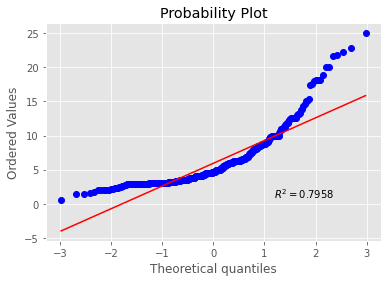

In [18]:
df = df[df['cPescadoKG']<44]
stats.probplot(df['mlHG'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [19]:
# Despues de haber limpiado estos datos atipicos, con un R de almenos 0.79 para las variables, se buscará el mejor modelo.

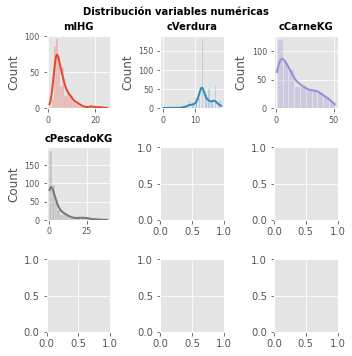

In [20]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [21]:
list(df)

['mlHG', 'cVerdura', 'dCigarro', 'cCarneKG', 'cPescadoKG', 'dCafe']

### Modelo 1 , Forma lineal

In [22]:
import statsmodels.formula.api as smf
reg = smf.ols('mlHG ~  cVerdura + dCigarro + cCarneKG + cPescadoKG + dCafe'  , data=df) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   mlHG   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     54.97
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           6.58e-45
Time:                        17:41:12   Log-Likelihood:                -1187.4
No. Observations:                 475   AIC:                             2387.
Df Residuals:                     469   BIC:                             2412.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7824      0.786     -2.267      0.0

In [23]:
## Fisher 0%, almenos 1 b explica al modelo. (Prueba de significancia global)
#  Dcafe ni carne son significativas ni al 1, 5 ni 10%. no hay evidencia estadisitca,que estas variables expliquen el mlHg.
#  El intercepto es significativo al 5%.


### Modelo 2 , Forma lineal sin dcafe

In [24]:
import statsmodels.formula.api as smf
reg = smf.ols('mlHG ~  cVerdura + dCigarro + cCarneKG + cPescadoKG '  , data=df) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   mlHG   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     68.23
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.63e-45
Time:                        17:41:12   Log-Likelihood:                -1188.2
No. Observations:                 475   AIC:                             2386.
Df Residuals:                     470   BIC:                             2407.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7691      0.787     -2.249      0.0

In [25]:
## Fisher 0%, almenos 1 b explica al modelo. (Prueba de significancia global)
# Intercepto y cCarne significativas al 5%. el resto al 1%.

<AxesSubplot:xlabel='cCarneKG', ylabel='mlHG'>

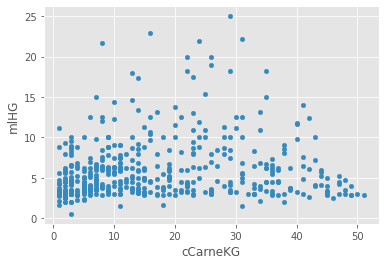

In [26]:
df.plot.scatter(x='cCarneKG',y= 'mlHG')

In [27]:
# Respecto al grafico anterior se puede intuir que la forma lineal no acopla todos los datos de forma correcta.
# Se probará un ajuste exponencial y logaritmico.

In [28]:
# trabajando los datos usando Numpy. 


# Ajuste Logaritmico
df['lncarne'] = np.log(df['cCarneKG'])
df

,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe,lncarne
188,3.05,12,1,10,0,1,2.302585
168,5.00,14,0,5,0,0,1.609438
40,3.25,15,0,3,0,0,1.098612
203,3.25,9,0,29,0,1,3.367296
71,3.25,12,1,14,0,1,2.639057
...,...,...,...,...,...,...,...
327,15.00,11,0,35,31,1,3.555348
291,6.25,11,0,35,31,1,3.555348
442,6.50,14,0,41,33,1,3.713572
58,2.91,12,1,20,34,1,2.995732


### Modelo 3, Carne en forma Logaritmica.

In [29]:
import statsmodels.formula.api as smf
reg = smf.ols('mlHG ~  cVerdura + dCigarro + lncarne + cPescadoKG '  , data=df) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   mlHG   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     73.58
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           2.17e-48
Time:                        17:41:12   Log-Likelihood:                -1181.5
No. Observations:                 475   AIC:                             2373.
Df Residuals:                     470   BIC:                             2394.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8370      0.811     -3.499      0.0

### Modelo 4,Carne en forma cuadratica

In [30]:

# trabajando los datos usando Numpy. 


# Ajuste Cuadratico
df['carne2'] = np.power(df['cCarneKG'],2)
df


,mlHG,cVerdura,dCigarro,cCarneKG,cPescadoKG,dCafe,lncarne,carne2
188,3.05,12,1,10,0,1,2.302585,100
168,5.00,14,0,5,0,0,1.609438,25
40,3.25,15,0,3,0,0,1.098612,9
203,3.25,9,0,29,0,1,3.367296,841
71,3.25,12,1,14,0,1,2.639057,196
...,...,...,...,...,...,...,...,...
327,15.00,11,0,35,31,1,3.555348,1225
291,6.25,11,0,35,31,1,3.555348,1225
442,6.50,14,0,41,33,1,3.713572,1681
58,2.91,12,1,20,34,1,2.995732,400


In [31]:
import statsmodels.formula.api as smf
reg = smf.ols('mlHG ~  cVerdura + dCigarro + cCarneKG + carne2 + cPescadoKG '  , data=df) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   mlHG   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     62.93
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.67e-50
Time:                        17:41:12   Log-Likelihood:                -1175.1
No. Observations:                 475   AIC:                             2362.
Df Residuals:                     469   BIC:                             2387.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2190      0.771     -2.879      0.0